<a href="https://colab.research.google.com/github/dhananjayaherna/dhananjayaherna.github.io/blob/main/AMQI_Assignment_5_23PH40023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5 (Project)
#### Name : Dhananjaya Herna
#### Roll No : 23PH40023


System (3) : Ising Model with Transverse Field.

(i) The Hamiltonian of the system is given by

 $ \hat{H} = -J \sum_{\langle i,j \rangle} Z_i Z_j - h \sum_{i} X_i $

Let us calculate the ground state energy value for a 4 site 1 dimensional spin chain.
Let J = 3.0 and h = 2.0

####(ii) Comparison between TwoLocal and UCCSD

In [ ]:
from qiskit_algorithms.minimum_eigensolvers import VQE
from qiskit.primitives import Estimator
from qiskit_algorithms.optimizers import SLSQP
from qiskit.quantum_info.operators import SparsePauliOp
from qiskit.circuit.library import TwoLocal


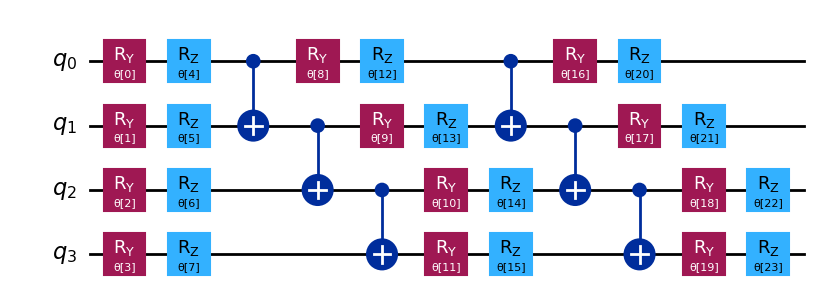

In [ ]:
J = 4.0
h = 1.0

hamiltonian = SparsePauliOp(['ZZII','IZZI','IIZZ','XIII','IXII','IIXI','IIIX'],[-J,-J,-J,-h,-h,-h,-h])

est = Estimator()
opt = SLSQP()

ansatz = TwoLocal(hamiltonian.num_qubits, ['ry','rz'], 'cx', entanglement = 'linear', reps = 2)

ansatz.decompose().draw('mpl')

In [ ]:
vqe = VQE(ansatz = ansatz, estimator = est, optimizer = opt)
result = vqe.compute_minimum_eigenvalue(hamiltonian)

In [ ]:
print('Ground State Energy: ', result.eigenvalue)

Ground State Energy:  -12.37473968871879


This is the ground state Energy Value obtained through TwoLocal Ansatz.

Let's now try using UCCSD ansatz.

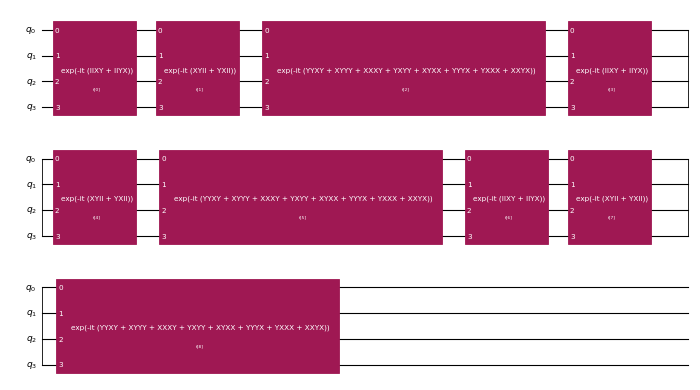

In [ ]:
from qiskit_nature.second_q.circuit.library import UCCSD
from qiskit_nature.second_q.mappers import JordanWignerMapper

spatial_orbitals = 2   # Half of Number of Spin Sites
num_particles = (1, 1)

## I am making a 4 site case by using 2 spatial orbitals as UCCSD doesn't support direct spin to spin mapping

mapper = JordanWignerMapper()

uccsd = UCCSD(
    num_spatial_orbitals = spatial_orbitals,
    num_particles=num_particles,
    qubit_mapper=mapper,
    reps = 3
)

uccsd.decompose().draw("mpl",scale = 0.4)

In [ ]:
vqe = VQE(ansatz = uccsd, estimator = est, optimizer = opt)
result2 = vqe.compute_minimum_eigenvalue(hamiltonian)

In [ ]:
print('Ground State Energy: ', result2.eigenvalue)

Ground State Energy:  -11.999999999999526


This is the result obtained using UCCSD ansatz.

####(iii) Comparison of Opmitizers : CG vs Powell

In [ ]:
## Comparison done considering TwoLocal Ansatz
from qiskit_algorithms.optimizers import CG, POWELL

ansatz = TwoLocal(hamiltonian.num_qubits, ['ry','rz'], 'cx', entanglement = 'linear', reps = 2)

vqe_cg = VQE(ansatz = ansatz, estimator = est, optimizer = CG())
result_cg = vqe_cg.compute_minimum_eigenvalue(hamiltonian)

print("Energy using CG optimizer :", result_cg.eigenvalue)

Energy using CG optimizer : -12.374653309613507


In [ ]:
vqe_pow = VQE(ansatz = ansatz, estimator = est, optimizer = POWELL())
result_pow = vqe_pow.compute_minimum_eigenvalue(hamiltonian)

print("Energy using CG optimizer :",result_pow.eigenvalue)

Energy using CG optimizer : -12.378185218827651
